In [44]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

Reading graph edges and nodes:

In [12]:
with open('../csv_files/metro_edges_no_duplicated_edges_no_cycles_networkx.csv') as f:
    f.readline()        
    g = nx.parse_edgelist(f, delimiter=',', nodetype=int, data=(('Weight', float), ('edge_name', str), ('edge_color', str), ('travel_seconds', float) ), create_using = nx.DiGraph())
    
with open('../csv_files/metro_gephi_nodes_coordinates.csv') as f:
    reader = csv.DictReader(f)

    node_latitudes = {}
    node_longitudes = {}
    node_names = {}
    
    for row in reader:
        node_latitudes[ int(row['Id']) ] = float(row['latitude'])
        node_longitudes[ int(row['Id']) ] = float(row['longitude'])
        node_names[ int(row['Id']) ] = row['Label']
        
nx.set_node_attributes(g, name = 'latitude', values = node_latitudes)
nx.set_node_attributes(g, name = 'longitude', values = node_longitudes)
nx.set_node_attributes(g, name = 'name', values = node_names)

In [19]:
def top_n_stations_by_attribute(graph, attr_name, n):
    return pd.DataFrame.from_records(map(lambda x: x[1],  list(graph.nodes(data=True)) ))[['name', attr_name]].sort_values(attr_name, ascending = False)[:(n+1)].reset_index(drop=True).shift()[1:]

Top 35 stations with more neighbour stations 

In [25]:
nx.set_node_attributes(g, name = 'degree', values = dict(g.degree))

stations_and_their_neighbours = top_n_stations_by_attribute(g, 'degree', len(g.edges()))

stations_and_their_neighbours[:35]

,name,degree
1,AVENIDA DE AMERICA,7.0
2,SOL,6.0
3,ALONSO MARTINEZ,6.0
4,PLAZA DE CASTILLA,5.0
5,OPERA,5.0
6,PRINCIPE PIO,5.0
7,DIEGO DE LEON,5.0
8,NUEVOS MINISTERIOS,5.0
9,CUATRO CAMINOS,5.0
10,MAR DE CRISTAL,4.0


Neighbours' count histogram

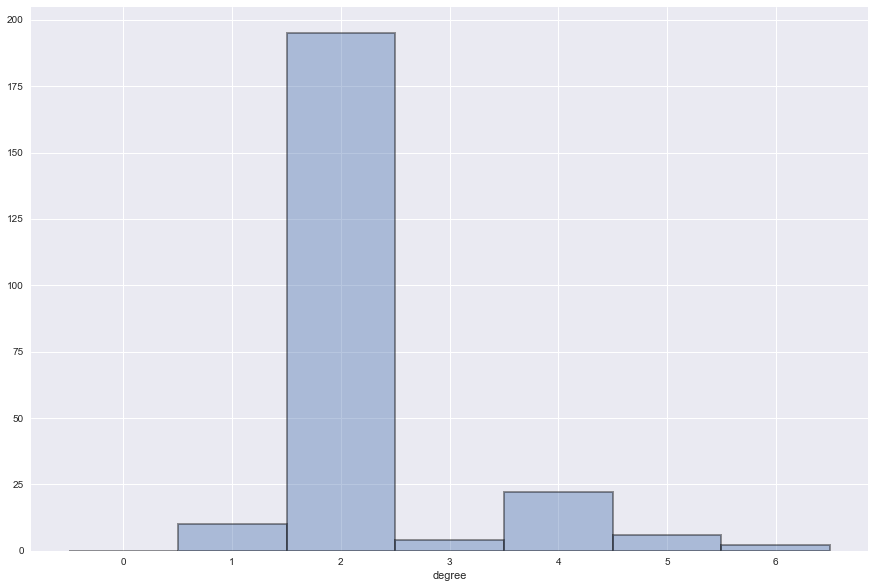

In [45]:
sns.plt.figure(figsize=(15, 10))
sns.distplot(stations_and_their_neighbours['degree'], kde=False, rug=False, bins = np.arange(8)-0.5, hist_kws=dict(edgecolor='k', linewidth=2))
sns.plt.show()

In [49]:
stations_and_their_neighbours.groupby('degree').count().rename(columns={'name': 'count'})

,count
degree,
1.0,10
2.0,195
3.0,4
4.0,22
5.0,6
6.0,2
7.0,1


Most of the stations are connected to two other stations. 

There are 10 Metro stations which are connected to only 1 stations: these stations are the most vulnerable because they strongly depend on other stations to remain connected to the Madrid Metro network.

Calculating stations importance using Closeness Centrality: This metric indicates how long it will take for information (people) from a node (station) "u" will take to reach other nodes (stations) in the network.

In [15]:
nx.set_node_attributes(g, name = 'closeness_centrality', values = nx.closeness_centrality(g, distance = 'travel_seconds'))

Top 20 most important (according to Closeness Centrality algorithm) Metro stations are shown

In [21]:
top_n_stations_by_attribute(g, 'closeness_centrality', 20)

,name,closeness_centrality
1,BILBAO,0.000098
2,CALLAO,0.000087
3,PRINCIPE PIO,0.000085
4,PLAZA DE CASTILLA,0.000079
5,GREGORIO MARAÑON,0.000068
6,PUERTA DEL ANGEL,0.000062
7,OPERA,0.000060
8,CUATRO CAMINOS,0.000058
9,VALDEZARZA,0.000058
10,SAN BERNARDO,0.000057


Another metric to have in mind: Betweenness Centrality. This metric indicates how often a node (station) is found on a shortest path between two nodes (stations) in the network.

In [17]:
nx.set_node_attributes(g, name = 'betweenness_centrality', values = nx.betweenness_centrality(g, normalized = True, weight = 'Weight'))

Top 20 most important (according to Betweeness Centrality algorithm) Metro stations are shown

In [22]:
top_n_stations_by_attribute(g, 'betweenness_centrality', 20)

,name,betweenness_centrality
1,LEGAZPI,0.016388
2,USERA,0.016004
3,PACIFICO,0.015603
4,PLAZA ELIPTICA,0.015586
5,MENDEZ ALVARO,0.015394
6,ARGANZUELA-PLANETARIO,0.015150
7,OPORTO,0.014418
8,OPAÑEL,0.014331
9,SAINZ DE BARANDA,0.014034
10,CONDE DE CASAL,0.013964
